In [28]:
from process_image import *
from model_nn import *

In [29]:
input_directory = "../Dataset/Foto_Resize_Rotate_70x70" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(968, 4900) (968, 15) (208, 4900) (208, 15) (208, 4900) (208, 15)


In [30]:
model_50 = FaceRecognitionModel(X_train.shape[1], [64], y_train.shape[1])

In [31]:
error_train, error_val = model_50.train(X_train, y_train, X_val, y_val, epochs=20000, learning_rate=1e-3, optimizer='sgd', generate_new_params=True)

Params rewritten


Epoch 0, Training Loss: 3.118e+00, Validation Loss: 2.951e+00, Patience: 0, Learning Rate: 0.001
Epoch 1, Training Loss: 2.960e+00, Validation Loss: 2.879e+00, Patience: 0, Learning Rate: 0.001
Epoch 2, Training Loss: 2.887e+00, Validation Loss: 2.837e+00, Patience: 0, Learning Rate: 0.001
Epoch 3, Training Loss: 2.844e+00, Validation Loss: 2.808e+00, Patience: 0, Learning Rate: 0.001
Epoch 4, Training Loss: 2.814e+00, Validation Loss: 2.785e+00, Patience: 0, Learning Rate: 0.001
Epoch 5, Training Loss: 2.791e+00, Validation Loss: 2.768e+00, Patience: 0, Learning Rate: 0.001
Epoch 6, Training Loss: 2.773e+00, Validation Loss: 2.753e+00, Patience: 0, Learning Rate: 0.001
Epoch 7, Training Loss: 2.758e+00, Validation Loss: 2.741e+00, Patience: 0, Learning Rate: 0.001
Epoch 8, Training Loss: 2.745e+00, Validation Loss: 2.731e+00, Patience: 0, Learning Rate: 0.001
Epoch 9, Training Loss: 2.735e+00, Validation Loss: 2.722e+00, Patience: 0, Learning Rate: 0.001
Epoch 10, Training Loss: 2.725

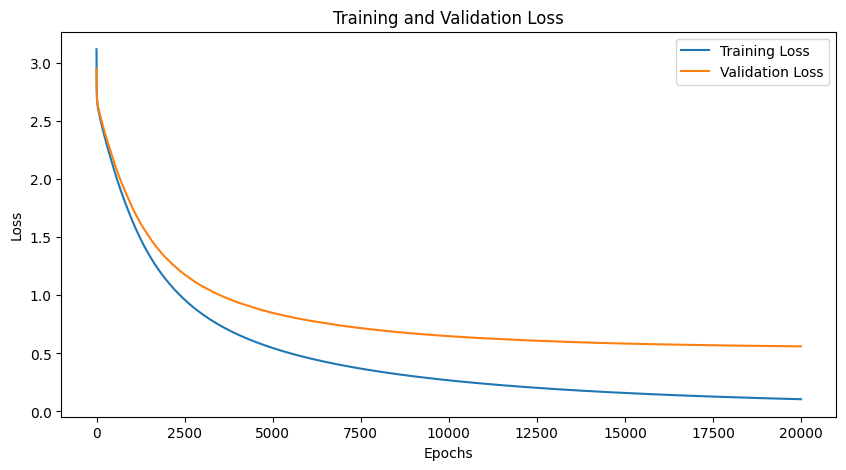

In [32]:
model_50.plot_training_error(error_train, error_val)

In [33]:
y_pred = model_50.test(X_test, y_test)
print(X_test.shape, y_test.shape, y_pred.shape)

Test Error : 0.44680560683100573
(208, 4900) (208, 15) (208, 15)


In [34]:
model_50.add_labels_from_folders(input_directory)
model_50.evaluate_metrics(X_test, y_test)

Accuracy: 0.8894230769230769
Azmira - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
David - Precision: 0.8421052631578947, Recall: 1.0, F1 Score: 0.9142857142857143
Dimas - Precision: 0.9, Recall: 1.0, F1 Score: 0.9473684210526316
Fadhli - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Fadlin - Precision: 0.75, Recall: 1.0, F1 Score: 0.8571428571428571
Hafidz - Precision: 0.9090909090909091, Recall: 0.7142857142857143, F1 Score: 0.8
Haidar - Precision: 1.0, Recall: 0.7142857142857143, F1 Score: 0.8333333333333333
Hanna - Precision: 0.8571428571428571, Recall: 1.0, F1 Score: 0.923076923076923
Keiko - Precision: 0.8095238095238095, Recall: 0.9444444444444444, F1 Score: 0.8717948717948718
Khansa - Precision: 0.8, Recall: 0.3076923076923077, F1 Score: 0.4444444444444444
Mikhael - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Puti - Precision: 0.8461538461538461, Recall: 0.9166666666666666, F1 Score: 0.8799999999999999
Raesa - Precision: 0.7692307692307693, Recall: 0.7142857142857143, F1 Score: 0.740

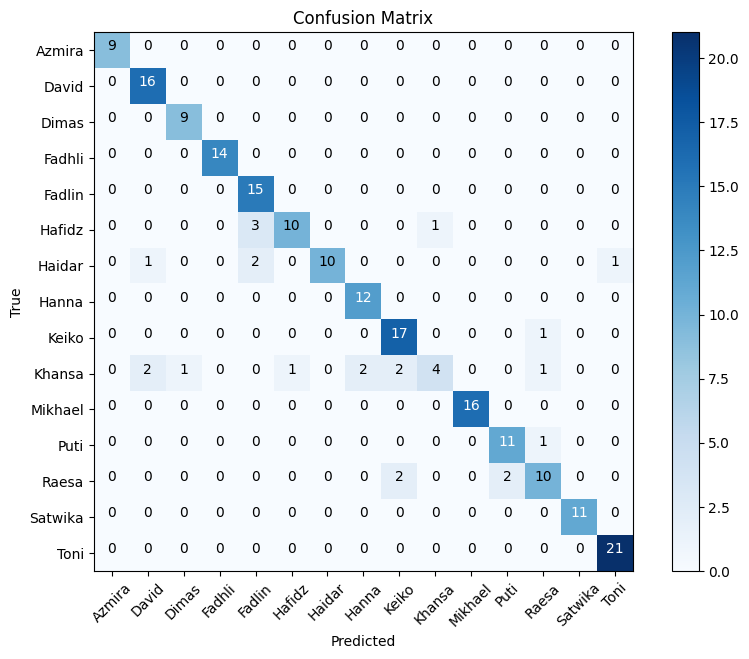

In [35]:
model_50.plot_confusion_matrix(X_test, y_test)

In [36]:
model_50.save_weights("./My_Model_50/08_Ishmael_Rotate.pkl")